In [37]:
pwd

'/home/wsuser/work'

In [38]:
ls

'Dataset Plant Disease'/


In [33]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='thO3WkzQ0BLjgpVOpoxrvZKqz6etb6l_O_3hhFf1jB1M',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystemfo-donotdelete-pr-zowp5njdtamugj'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction (1).zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/



In [39]:
ls

'Dataset Plant Disease'/


In [ ]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [40]:
ls

'Dataset Plant Disease'/


In [41]:
pwd

'/home/wsuser/work'

In [42]:
from keras.preprocessing.image import ImageDataGenerator

In [43]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [44]:
test_datagen = ImageDataGenerator(rescale = 1)

In [45]:
ls

'Dataset Plant Disease'/


In [46]:
pwd

'/home/wsuser/work'

In [108]:
x_train= train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",batch_size=32,target_size=(128,128),class_mode='categorical')

Found 5384 images belonging to 6 classes.


In [109]:
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",batch_size=32,target_size=(128,128),class_mode='categorical')

Found 1686 images belonging to 6 classes.


In [110]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [111]:
model=Sequential()

In [112]:
model.add(Convolution2D(32,(3,3),input_shape = (128,128,3),activation = 'relu'))

In [113]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [114]:
model.add(Flatten())

In [115]:
model.add(Dense(40,  'relu'))
model.add(Dense(20, 'relu'))
model.add(Dense(6,  'softmax', ))

In [116]:
model.compile(optimizer='adam', loss = "categorical_crossentropy" , metrics =['accuracy'])

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 127008)            0         
                                                                 
 dense_9 (Dense)             (None, 40)                5080360   
                                                                 
 dense_10 (Dense)            (None, 20)                820       
                                                                 
 dense_11 (Dense)            (None, 6)                 126       
                                                      

In [119]:
model.fit(x_train,epochs=20,steps_per_epoch=89,validation_data = x_test, validation_steps = 27)

Epoch 1/20
89/89 [==============================] - 27s 300ms/step - loss: 2.1600 - accuracy: 0.5407 - val_loss: 102.8188 - val_accuracy: 0.7049
Epoch 2/20
89/89 [==============================] - 28s 308ms/step - loss: 0.7809 - accuracy: 0.7026 - val_loss: 90.7416 - val_accuracy: 0.7419
Epoch 3/20
89/89 [==============================] - 28s 310ms/step - loss: 0.5262 - accuracy: 0.8173 - val_loss: 65.8389 - val_accuracy: 0.8044
Epoch 4/20
89/89 [==============================] - 28s 314ms/step - loss: 0.3868 - accuracy: 0.8591 - val_loss: 70.9222 - val_accuracy: 0.8206
Epoch 5/20
89/89 [==============================] - 27s 307ms/step - loss: 0.2865 - accuracy: 0.9073 - val_loss: 131.2805 - val_accuracy: 0.6562
Epoch 6/20
89/89 [==============================] - 28s 311ms/step - loss: 0.2798 - accuracy: 0.9122 - val_loss: 117.2961 - val_accuracy: 0.7083
Epoch 7/20
89/89 [==============================] - 28s 312ms/step - loss: 0.2287 - accuracy: 0.9288 - val_loss: 164.8804 - val_accur

In [120]:
ls

'Dataset Plant Disease'/   fruit.h5


In [121]:
model.save("fruit.h5")

In [122]:
ls

'Dataset Plant Disease'/   fruit.h5


In [123]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [124]:
model = load_model('fruit.h5')

In [128]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/0a553fc0-fc2c-4598-baba-3bc10191447c___RS_HL 5969.JPG", target_size = (128,128))


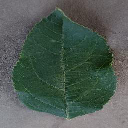

In [133]:
img

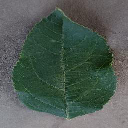

In [134]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/0a553fc0-fc2c-4598-baba-3bc10191447c___RS_HL 5969.JPG", target_size = (128,128))
img

In [135]:
x=image.img_to_array(img)


In [136]:
x

array([[[120., 118., 123.],
        [113., 111., 116.],
        [114., 112., 117.],
        ...,
        [106., 100., 102.],
        [112., 106., 108.],
        [112., 106., 108.]],

       [[112., 110., 115.],
        [107., 105., 110.],
        [109., 107., 112.],
        ...,
        [107., 101., 103.],
        [111., 105., 107.],
        [108., 102., 104.]],

       [[117., 115., 120.],
        [115., 113., 118.],
        [111., 109., 114.],
        ...,
        [108., 102., 104.],
        [109., 103., 105.],
        [105.,  99., 101.]],

       ...,

       [[141., 142., 147.],
        [145., 146., 151.],
        [142., 143., 148.],
        ...,
        [149., 143., 143.],
        [143., 137., 137.],
        [136., 130., 130.]],

       [[140., 141., 146.],
        [144., 145., 150.],
        [139., 140., 145.],
        ...,
        [149., 143., 143.],
        [151., 145., 145.],
        [149., 143., 143.]],

       [[145., 146., 151.],
        [146., 147., 152.],
        [142., 1

In [137]:
x=np.expand_dims(x,axis=0)

In [138]:
x

array([[[[120., 118., 123.],
         [113., 111., 116.],
         [114., 112., 117.],
         ...,
         [106., 100., 102.],
         [112., 106., 108.],
         [112., 106., 108.]],

        [[112., 110., 115.],
         [107., 105., 110.],
         [109., 107., 112.],
         ...,
         [107., 101., 103.],
         [111., 105., 107.],
         [108., 102., 104.]],

        [[117., 115., 120.],
         [115., 113., 118.],
         [111., 109., 114.],
         ...,
         [108., 102., 104.],
         [109., 103., 105.],
         [105.,  99., 101.]],

        ...,

        [[141., 142., 147.],
         [145., 146., 151.],
         [142., 143., 148.],
         ...,
         [149., 143., 143.],
         [143., 137., 137.],
         [136., 130., 130.]],

        [[140., 141., 146.],
         [144., 145., 150.],
         [139., 140., 145.],
         ...,
         [149., 143., 143.],
         [151., 145., 145.],
         [149., 143., 143.]],

        [[145., 146., 151.],
       

In [139]:
y=np.argmax(model.predict(x),axis=1)

In [140]:
y

array([0])

In [141]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [143]:
img= np.expand_dims(img,axis = 0)
result=model.predict(img)
print(result)

[[1. 0. 0. 0. 0. 0.]]


In [146]:
!tar -zcvf fruit-classification-model.tgz fruit.h5

fruit.h5


In [147]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [148]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 19.4 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [149]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 22.6 MB/s eta 0:00:01


In [150]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"nbe0y1pgC4AGnHIN9BIBqQ-ifblO8WdKdOcT2ipcdMfI"
}
client=APIClient(wml_credentials)

In [151]:
client

In [163]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])



In [165]:
space_uid = guid_from_space_name(client,'fruit')
print("Space UID = " + space_uid)

Space UID = e8e36a6f-2398-48fa-b396-48747b85ef88


In [166]:
client.set.default_space(space_uid)

'SUCCESS'

In [167]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [168]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [169]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [171]:
model_details=client.repository.store_model(model='fruit-classification-model.tgz',meta_props={
   client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid

})


In [172]:
model_id=client.repository.get_model_id(model_details)

In [173]:
model_id

'a247f910-1bd4-4dfe-9509-9c2c8b9666b5'

In [174]:
client.repository.download(model_id,'fruit.tar.gb')

Successfully saved model content to file: 'fruit.tar.gb'


'/home/wsuser/work/fruit.tar.gb'

In [175]:
ls

'Dataset Plant Disease'/          fruit.h5
 fruit-classification-model.tgz   fruit.tar.gb


In [176]:
client.repository.download("a247f910-1bd4-4dfe-9509-9c2c8b9666b5",'fruit.tat.gz')

Successfully saved model content to file: 'fruit.tat.gz'


'/home/wsuser/work/fruit.tat.gz'